- import Required Libraries

In [21]:
# Linear algebra
import numpy as np

# Data Processing 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# scikit Learn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer

#Models 
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor 

#Metrics
from sklearn.metrics import mean_squared_error 

# ignore Warning 
from warnings import filterwarnings 
filterwarnings("ignore")

- Load Dataset

In [22]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

In [23]:
print("train_shape : ", train.shape) 
print("test_shape : ", test.shape)

train_shape :  (1460, 81)
test_shape :  (1459, 80)


- Data Overview

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
test.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
dtype: int64

In [7]:
train.duplicated().sum()

np.int64(0)

- Analysis

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- Handle Missing Value

In [11]:
missing_value = train.isnull().sum() 
missing_value = missing_value[missing_value > 0 ].sort_values(ascending=False) 
missing_value.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

In [30]:
train.isna().sum().sum()

np.int64(7829)

- Visualization Analysis

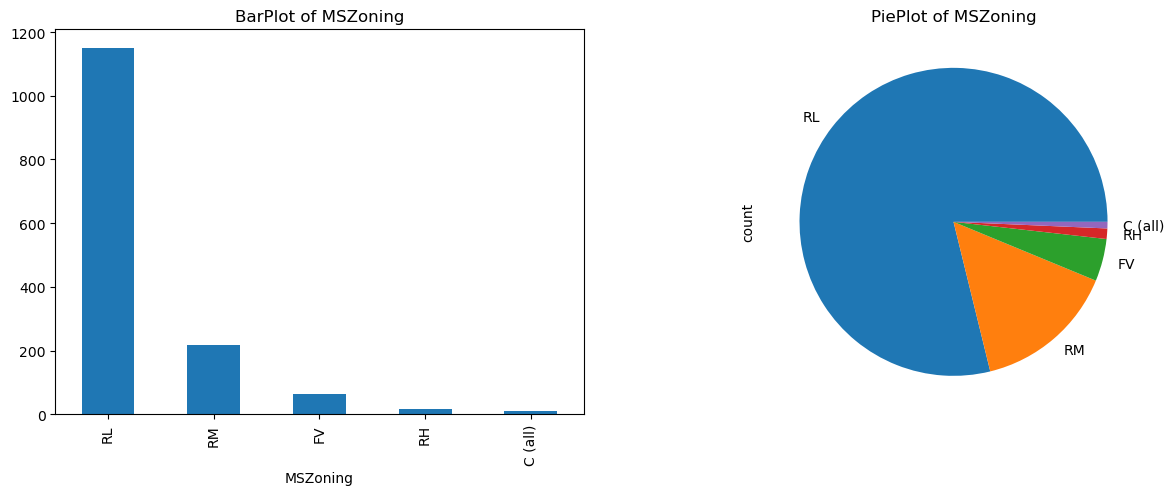

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
train["MSZoning"].value_counts().plot(kind='bar')
plt.title("BarPlot of MSZoning")

plt.subplot(1,2,2)
train['MSZoning'].value_counts().plot(kind='pie')
plt.title("PiePlot of MSZoning")
plt.show()

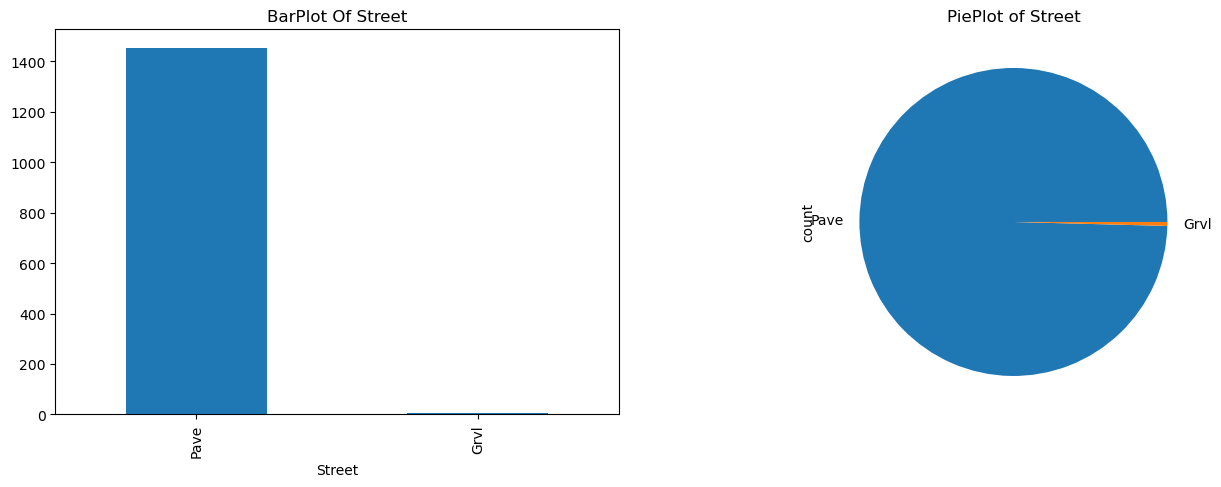

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
train['Street'].value_counts().plot(kind='bar')
plt.title("BarPlot Of Street")

plt.subplot(1,2,2)
train["Street"].value_counts().plot(kind='pie') 
plt.title("PiePlot of Street")
plt.show()

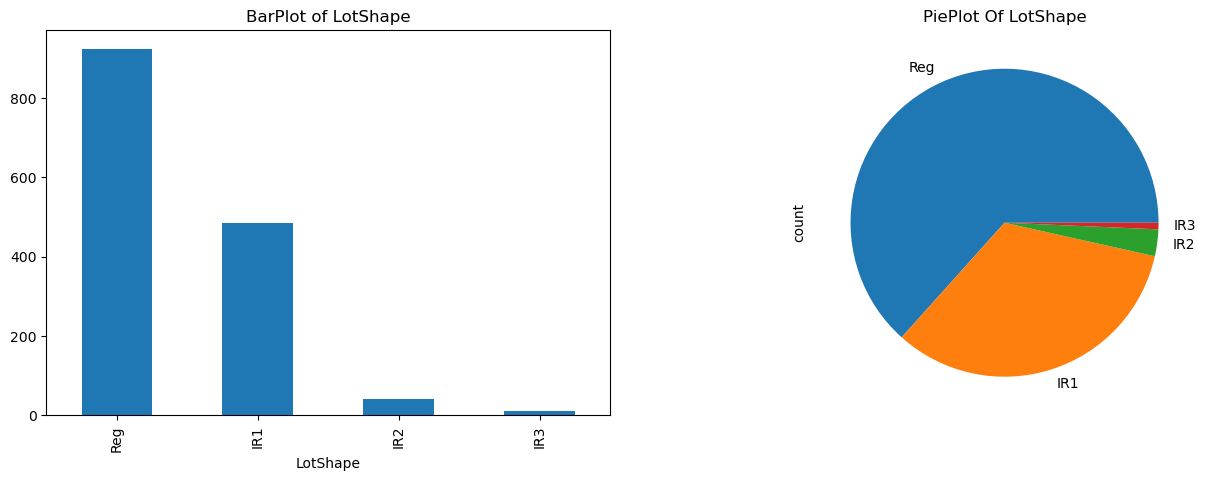

In [17]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
train["LotShape"].value_counts().plot(kind='bar')
plt.title("BarPlot of LotShape")

plt.subplot(1,2,2) 
train["LotShape"].value_counts().plot(kind='pie')
plt.title("PiePlot Of LotShape")
plt.show()

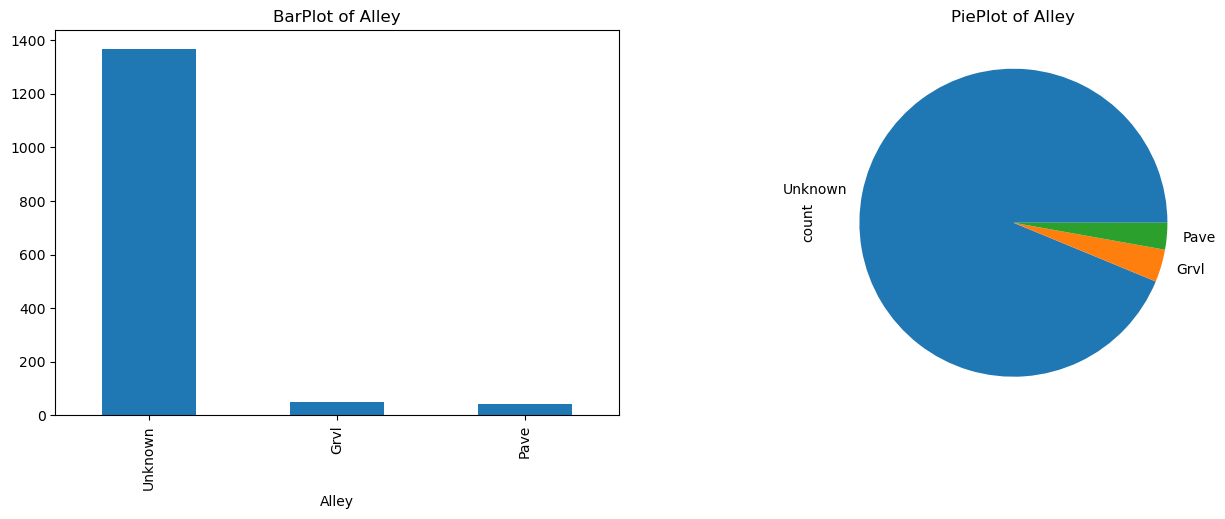

In [19]:
plt.figure(figsize=(16,5)) 
plt.subplot(1,2,1) 
train['Alley'].value_counts().plot(kind='bar') 
plt.title("BarPlot of Alley")

plt.subplot(1,2,2)
train["Alley"].value_counts().plot(kind='pie')
plt.title("PiePlot of Alley") 
plt.show()

- Target Distribution

Text(0.5, 1.0, 'Original SalePrice Distribution')

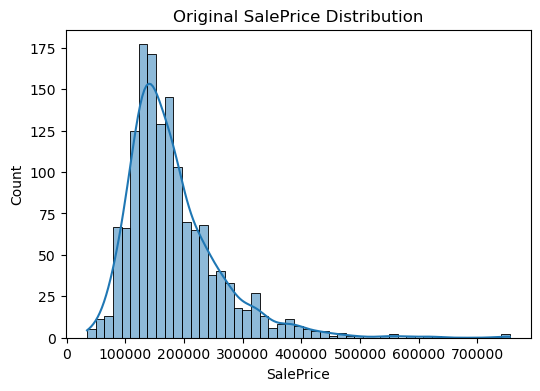

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(train['SalePrice'], kde=True)
plt.title("Original SalePrice Distribution")

- OverallQual vs SalePrice

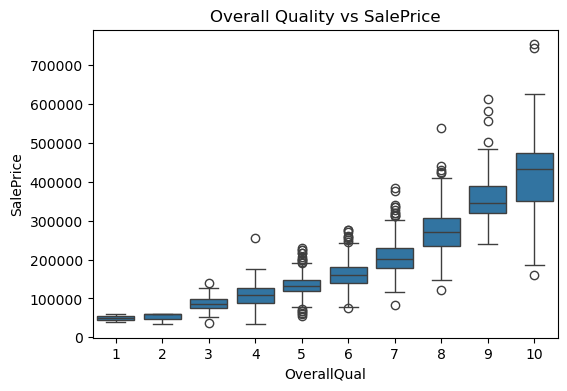

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x="OverallQual", y="SalePrice", data=train)
plt.title("Overall Quality vs SalePrice")
plt.show()

- Feature And Target Separation

In [26]:
X = train.drop(columns=["SalePrice", "Id"])
y = train["SalePrice"].map(lambda x: np.log(x+1))

- Feature Categorization

In [28]:
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

categorical_features = X.select_dtypes(include=("object")).columns.tolist()

print("The number of numerical features :", len(numerical_features))
print("The number of categorical features : ", len(categorical_features))

The number of numerical features : 36
The number of categorical features :  43


- Numerical Features benefit from scaling for linear model.

- Categorical features are encoded to be usable by ML algorithm.

- Missing values are handled inside pipelines to avoid data leakage

In [33]:
#Numeric pipeline with median
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

# Categorical pipeline 
categorical_pipeline = Pipeline( [
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
]) 

# ColumnTransformer 
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numerical_features),  
    ("cat", categorical_pipeline, categorical_features)
])

In [34]:
X_train_preprocessed = preprocessor.fit_transform(train)
X_test_preprocessed = preprocessor.transform(test)

- Ridge Model

In [37]:
# Ridge Pipeline

ridge_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),  
    ("ridge_model", Ridge(alpha=10, solver="lsqr"))
]) 

# cross validation 
ridge_scores = cross_val_score(
    ridge_pipeline, 
    X, 
    y, 
    cv=5, 
    scoring="neg_root_mean_squared_error",  
    n_jobs=-1
)

In [38]:
ridge_rmse = -ridge_scores.mean() 
print("Ridge RMSE", round(ridge_rmse, 5))

Ridge RMSE 0.18774


- Random Forest Regression Model

In [40]:
rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),  
    ("rf_model", RandomForestRegressor(
    n_estimators = 300, 
    max_depth = None,  
    min_samples_split = 2,  
    min_samples_leaf = 1,  
    random_state = 42,  
    n_jobs = -1
    ))
])

# Cross Validation  
rf_scores = cross_val_score(
    rf_pipeline,  
    X,
    y,  
    cv=5, 
    scoring="neg_root_mean_squared_error",  
    n_jobs=-1
)

In [41]:
rf_rmse = - rf_scores.mean() 
print("Random Forest rmse:", round(rf_rmse, 5))

Random Forest rmse: 0.14209


-  XGBoost Model

In [42]:
xgb_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),  
    ("xgb_model", XGBRegressor(
        n_estimators = 800,  
        learning_rate = 0.03,  
        max_depth = 4, 
        subsample = 0.8, 
        colsample_bytree = 0.8, 
        objective = "reg:squarederror",  
        random_state = 42, 
        n_jobs = -1
    ))
])

# Cross Validation 
xgb_scores = cross_val_score(
    xgb_pipeline,
    X, 
    y, 
    cv=5, 
    scoring = "neg_root_mean_squared_error",  
    n_jobs = -1
)

In [43]:
xgb_rmse = - xgb_scores.mean()
print("XGBoost RMSE:", round(xgb_rmse, 5))

XGBoost RMSE: 0.12182


- Model Comparison

- lower RMSE is better

In [49]:
comparison = pd.DataFrame({
    "Model" : ["Ridge Regression", "Random Forest", "XGBoost"], 
    "CV_RMSE" : [ridge_rmse, rf_rmse, xgb_rmse]
})

comparison = comparison.sort_values("CV_RMSE").reset_index(drop=True)
comparison

,Model,CV_RMSE
0,XGBoost,0.121821
1,Random Forest,0.142093
2,Ridge Regression,0.187745


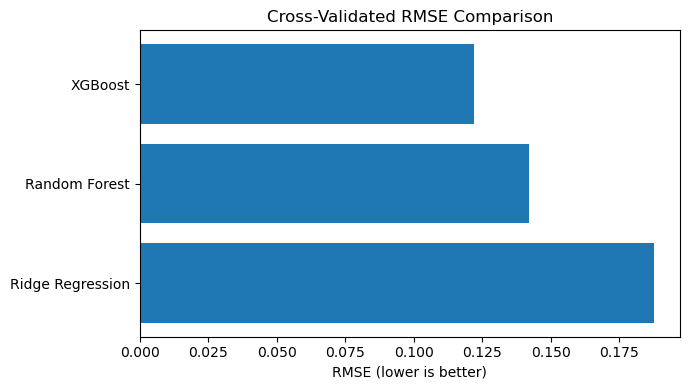

In [65]:
plt.figure(figsize=(7,4))
plt.barh(comparison["Model"], comparison["CV_RMSE"])
plt.title("Cross-Validated RMSE Comparison")
plt.xlabel("RMSE (lower is better)") 
plt.ylabel("")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

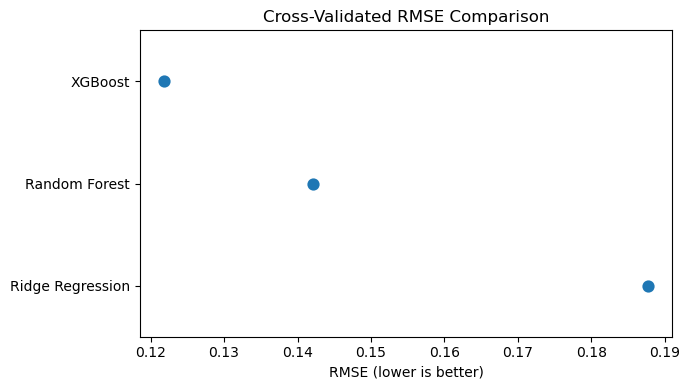

In [64]:
plt.figure(figsize=(7,4))
sns.pointplot(
    data=comparison,
    x="CV_RMSE",
    y="Model",
    join=False
)
plt.title("Cross-Validated RMSE Comparison")
plt.xlabel("RMSE (lower is better)")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [57]:
model_scores = {
    "Ridge" : ridge_rmse,  
    "Random Forest" : rf_rmse, 
    "XGBoost" : xgb_rmse
}

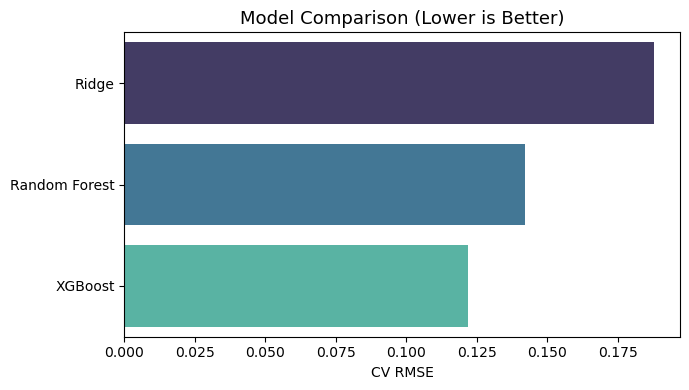

In [63]:
df_sns = pd.DataFrame(model_scores.items(), columns=["Model", "CV_RMSE"])
plt.figure(figsize=(7,4))
sns.barplot(
    data=df_sns,
    x="CV_RMSE",
    y="Model",
    palette="mako"
)

plt.title("Model Comparison (Lower is Better)", fontsize=13)
plt.xlabel("CV RMSE")
plt.ylabel("")
plt.tight_layout()
plt.show()

- Model Selection

- based on cross validation performance XGBoost is selected as the final model for prediction

In [69]:
Best_Model = xgb_pipeline
Best_Model_name = "XGBoost" 
print(f"Model Selected : {Best_Model_name}")

Model Selected : XGBoost


In [70]:
X_test = test.drop(columns=["Id"])

In [71]:
Best_Model.fit(X,y) 
test_preds = Best_Model.predict(X_test) 
final_preds = np.expm1(test_preds)

- Submission File

In [72]:
sub = pd.DataFrame({
    "Id": test["Id"],  
    "SalePrice" : final_preds
})

sub.to_csv("submission.csv", index = False)

In [73]:
sub.head()

,Id,SalePrice
0,1461,122942.890625
1,1462,153311.296875
2,1463,185929.843750
3,1464,188127.812500
4,1465,183134.390625
